# Comparação de dados rede ondas modelo TT

## Fonte de dados

### Rede ondas:

http://redeondas.furg.br/index.php/pt/dados/

### Tetratech Modelo

Arquivo encontra-se na tsunami - dados extraídos pela Mariana

## Procedimento para dos dados da Rede Ondas

* Baixar dados da rede ondas de acordo com a série temporal.
* Concatenar usando pandas
* Formatar os dados
* Resolver problema de registros duplicados com média
* Plotar

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from TTutils import MO
import seaborn as sns
%matplotlib inline

In [3]:
# criar serie temporal e formatar

ts = pd.date_range(
    start='2014-11-01',
    end='2017-08-01',
    freq='1M'
).strftime('%Y-%m')

# url
url = 'http://redeondas.furg.br/images/dados/praiadoforte/praiadoforte_cat_'

def ReadRedeOndas(url):
    
    try:
        df = pd.read_table(url)
        df.rename(columns={'%AAAA':'year',
                           'AAAA':'year',
                           'MM':'month',
                           'DD':'day',
                           'hh':'hour',
                           'mm':'minute'},inplace=True)
    except:
        df=pd.DataFrame()
    
    return df
    
# concatenar dado
df = pd.concat(
    [ReadRedeOndas('{}{}.txt'.format(url,time)) for time in ts],
    axis=0
)


df.drop(['ss'],inplace=True,axis=1)
df.index = pd.to_datetime(df.drop(['Dp','Hs','Tp'],axis=1))
df = df.loc[:,['Dp','Hs','Tp']]
df

,Dp,Hs,Tp
2014-11-25 00:00:00,81.57,0.93,7.5
2014-11-25 00:00:00,120.57,1.10,9.8
2014-11-25 00:00:00,66.57,1.11,6.1
2014-11-26 00:00:00,122.57,1.17,11.6
2014-11-26 00:00:00,75.57,1.24,6.7
2014-11-26 00:00:00,64.57,1.21,6.1
2014-11-26 00:00:00,79.57,1.11,6.1
2014-11-26 00:00:00,69.57,1.32,6.7
2014-11-26 00:00:00,77.57,1.35,7.5
2014-11-27 00:00:00,84.57,1.29,6.7


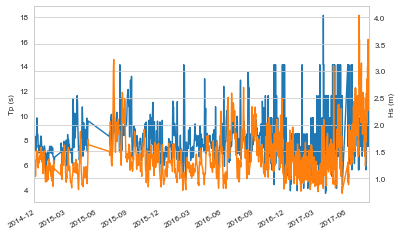

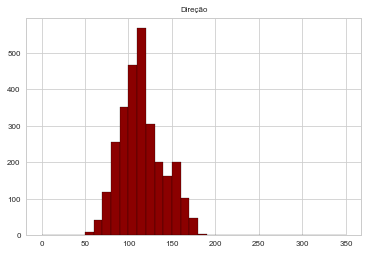

In [4]:

# remover arquivos duplocados e considerar a média do valor
df['Uh']=-np.sin(np.radians(df['Dp']))
df['Vh']=-np.cos(np.radians(df['Dp']))

dfm = df.groupby(df.index).mean()

dfm['Dp']=np.degrees(np.arctan2(-dfm['Uh'],-dfm['Vh']))
dfm.drop(['Uh','Vh'],axis=1,inplace=True)
ax1 = dfm['Tp'].plot()
ax2 = dfm['Hs'].plot(secondary_y=True)
ax2.set_ylabel('Hs (m)')
ax1.set_ylabel('Tp (s)')
plt.figure()
ax3 = dfm['Dp'].hist(bins=np.arange(0,360,10),edgecolor='k',facecolor='darkred')
ax3.set_title('Direção')

## Tratar dados do WW3

Os dados encontram-se no disco u.

In [5]:
ds = xr.open_dataset('u:\ww3_sergipe.nc')
ds=ds.squeeze()
ds

<xarray.Dataset>
Dimensions:          (time: 26280)
Coordinates:
    LONGITUDE90_90   float64 -36.75
    LATITUDE108_108  float64 -10.85
  * time             (time) datetime64[ns] 2013-01-01 2013-01-01T01:00:00 ...
Data variables:
    HS               (time) float64 1.252 1.252 1.247 1.244 1.242 1.241 ...
    TP               (time) float64 7.679 7.679 7.69 7.7 7.71 7.719 7.724 ...
    DIR              (time) float64 147.2 147.2 147.0 146.6 146.2 145.7 ...
    DP               (time) float64 152.0 152.0 152.1 152.0 152.0 152.0 ...
    LM               (time) float64 89.3 89.3 88.83 88.02 87.11 86.16 85.13 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.0
    history:      Mon Oct 16 19:01:39 2017: cdo mergetime ww3_201301.nc ww3_2...
    CDO:          Climate Data Operators version 1.5.4 (http://code.zmaw.de/p...

# Aqui apresento a comparação dos dados
Plotar período contra período

Hs contra HS 

e fazer os histogramas

Comparando resultados


(735562.0, 735963.9583333334)

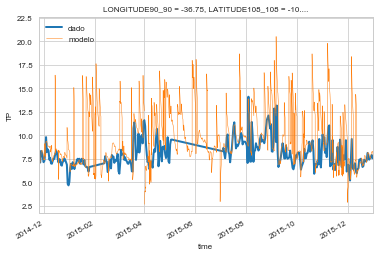

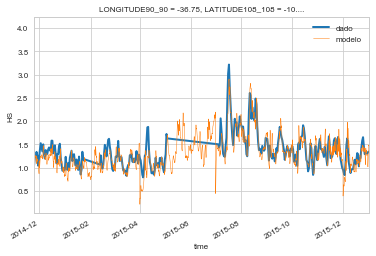

In [6]:
print('Comparando resultados')
plt.figure()
ax1 = dfm['Tp'].plot(label='dado',lw=2)
ds['TP'].plot(ax=ax1,label='modelo',lw=0.5)
ax1.legend()
ax1.set_xlim((dfm.index.values[0],ds.time.values[-1]))


plt.figure()
ax2 = dfm['Hs'].plot(label='dado',lw=2)
ds['HS'].plot(ax=ax2,label='modelo',lw=0.5)
ax2.legend()
ax2.set_xlim((dfm.index.values[0],ds.time.values[-1]))
#plt.figure()
#ax2 = dfm['Hs'].hist(label='dado',edgecolor='k')
#ds['HS'].hist(ax=ax2,label='modelo',edgecolor='k')


# Histogramas de hs
o de cima é o dado

o de baixo é modelo

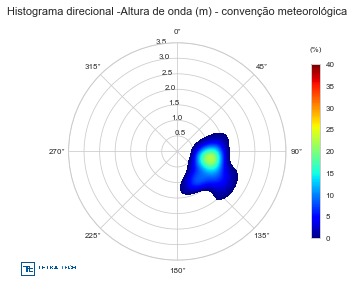

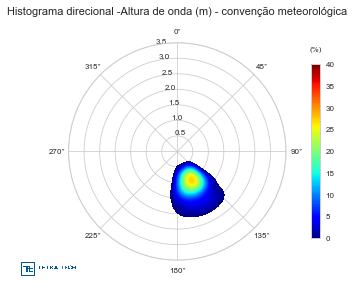

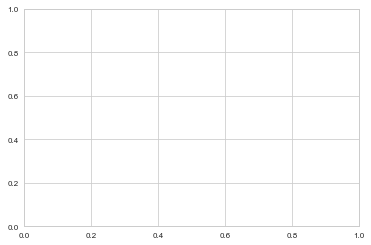

In [42]:
MO.HistDir(dfm['Hs'].loc[dfm.index.values[0]:ds.time.values[-1]],
           dfm['Dp'].loc[dfm.index.values[0]:ds.time.values[-1]],
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)
tini=dfm.index[0].strftime('%Y-%m-%d %H:%M:%S')
tend=dfm.index[-1].strftime('%Y-%m-%d %H:%M:%S')
MO.HistDir(ds['HS'].sel(time=slice(tini,tend)).values,
           ds['DP'].sel(time=slice(tini,tend)).values,
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)


# Histogramas de Tp
o de cima é o dado

o de baixo é modelo

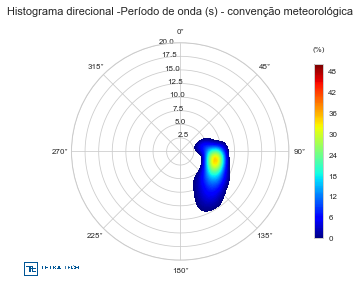

C:\Anaconda\envs\py36\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


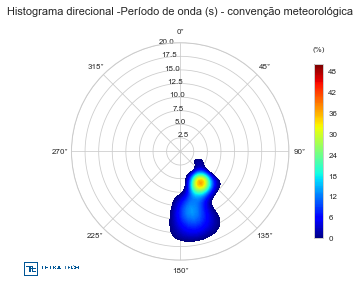

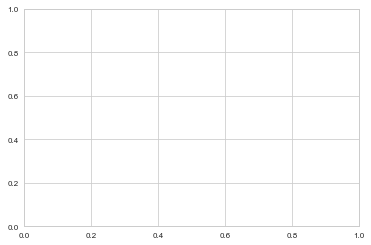

In [43]:
MO.HistDir(dfm['Tp'].loc[dfm.index.values[0]:ds.time.values[-1]],
           dfm['Dp'].loc[dfm.index.values[0]:ds.time.values[-1]],
           Pmax=20,
           MaxProb=50,
           par='tp',
           dir16=True,
           interpolado=True)

MO.HistDir(ds['TP'].sel(time=slice(tini,tend)).values,
           ds['DP'].sel(time=slice(tini,tend)).values,
           Pmax=20,
           MaxProb=50,
           par='tp',
           dir16=True,
           interpolado=True)



# Utilizando o ponto do modelo mais próximo do ponto do dado

In [57]:
dds=xr.open_dataset('u:/ww3_NE_campo.nc')
dds
y=[-12.603833]
x=[-37.97550]
ds = dds.sel(LONGITUDE81_95=x,LATITUDE99_109=y,method='nearest').squeeze()
ds

<xarray.Dataset>
Dimensions:         (time: 96408)
Coordinates:
    LONGITUDE81_95  float64 -38.0
    LATITUDE99_109  float64 -12.6
  * time            (time) datetime64[ns] 2005-01-01 2005-01-01T01:00:00 ...
Data variables:
    HS              (time) float64 0.3996 0.4309 0.4287 0.4126 0.3931 0.376 ...
    TP              (time) float64 2.885 2.953 3.128 3.205 3.25 3.295 3.351 ...
    DIR             (time) float64 82.95 86.95 90.38 93.4 95.93 97.82 99.14 ...
    DP              (time) float64 82.95 86.24 91.07 93.71 95.78 97.3 98.38 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.0
    history:      Tue Oct 17 11:13:02 2017: cdo mergetime ww3_200501.nc ww3_2...
    CDO:          Climate Data Operators version 1.5.4 (http://code.zmaw.de/p...

(735562.0, 735963.9583333334)

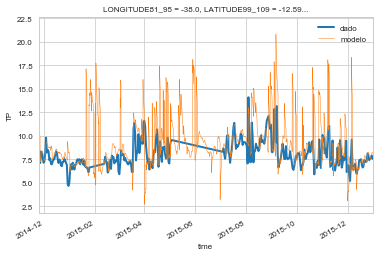

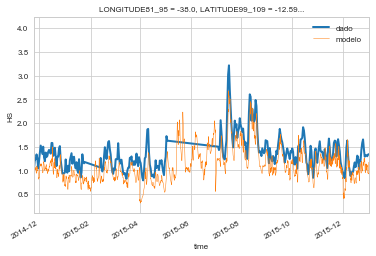

In [54]:
plt.figure()
ax1 = dfm['Tp'].plot(label='dado',lw=2)
ds['TP'].plot(ax=ax1,label='modelo',lw=0.5)
ax1.legend()
ax1.set_xlim((dfm.index.values[0],ds.time.values[-1]))


plt.figure()
ax2 = dfm['Hs'].plot(label='dado',lw=2)
ds['HS'].plot(ax=ax2,label='modelo',lw=0.5)
ax2.legend()
ax2.set_xlim((dfm.index.values[0],ds.time.values[-1]))
#plt.figure()
#ax2 = dfm['Hs'].hist(label='dado',edgecolor='k')
#ds['HS'].hist(ax=ax2,label='modelo',edgecolor='k')

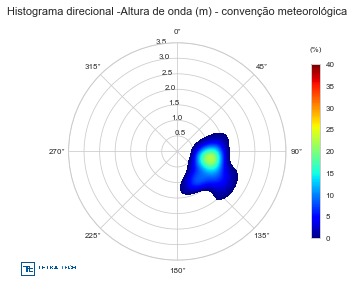

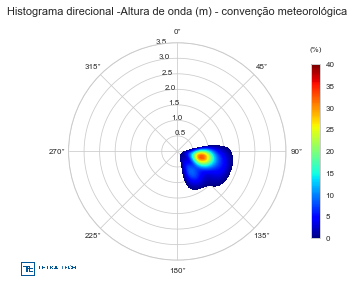

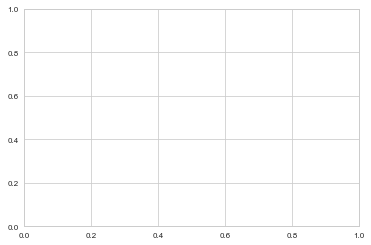

In [58]:
MO.HistDir(dfm['Hs'].loc[dfm.index.values[0]:ds.time.values[-1]],
           dfm['Dp'].loc[dfm.index.values[0]:ds.time.values[-1]],
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)
tini=dfm.index[0].strftime('%Y-%m-%d %H:%M:%S')
tend=dfm.index[-1].strftime('%Y-%m-%d %H:%M:%S')
MO.HistDir(ds['HS'].sel(time=slice(tini,tend)).values,
           ds['DP'].sel(time=slice(tini,tend)).values,
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)

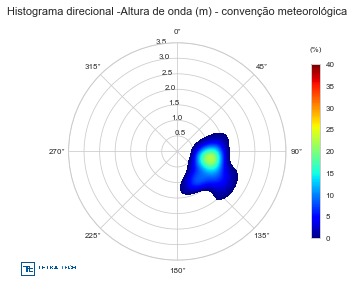

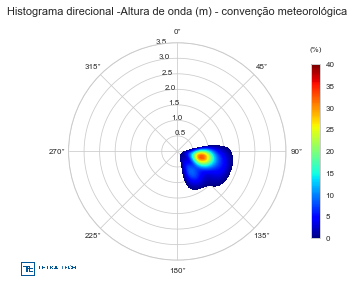

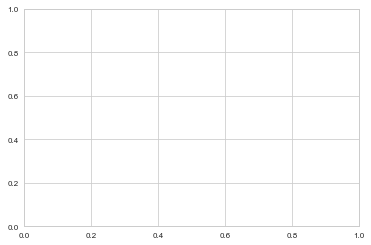

In [59]:
MO.HistDir(dfm['Hs'].loc[dfm.index.values[0]:ds.time.values[-1]],
           dfm['Dp'].loc[dfm.index.values[0]:ds.time.values[-1]],
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)
tini=dfm.index[0].strftime('%Y-%m-%d %H:%M:%S')
tend=dfm.index[-1].strftime('%Y-%m-%d %H:%M:%S')
MO.HistDir(ds['HS'].sel(time=slice(tini,tend)).values,
           ds['DP'].sel(time=slice(tini,tend)).values,
           Pmax=3.5,
           MaxProb=40,
           par='hs',
           dir16=True,
           interpolado=True)